In [90]:
#!pip install catboost

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def adjusted_r2(y_true, y_pred, X):

    n = len(y_true)        # number of samples
    p = X.shape[1]         # number of features
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

In [92]:
df = pd.read_csv('/content/airlines_flights_data.csv')

In [93]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [94]:
df.shape

(300153, 12)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [96]:
df.isna().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [97]:
df.duplicated().sum()

np.int64(0)

In [98]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


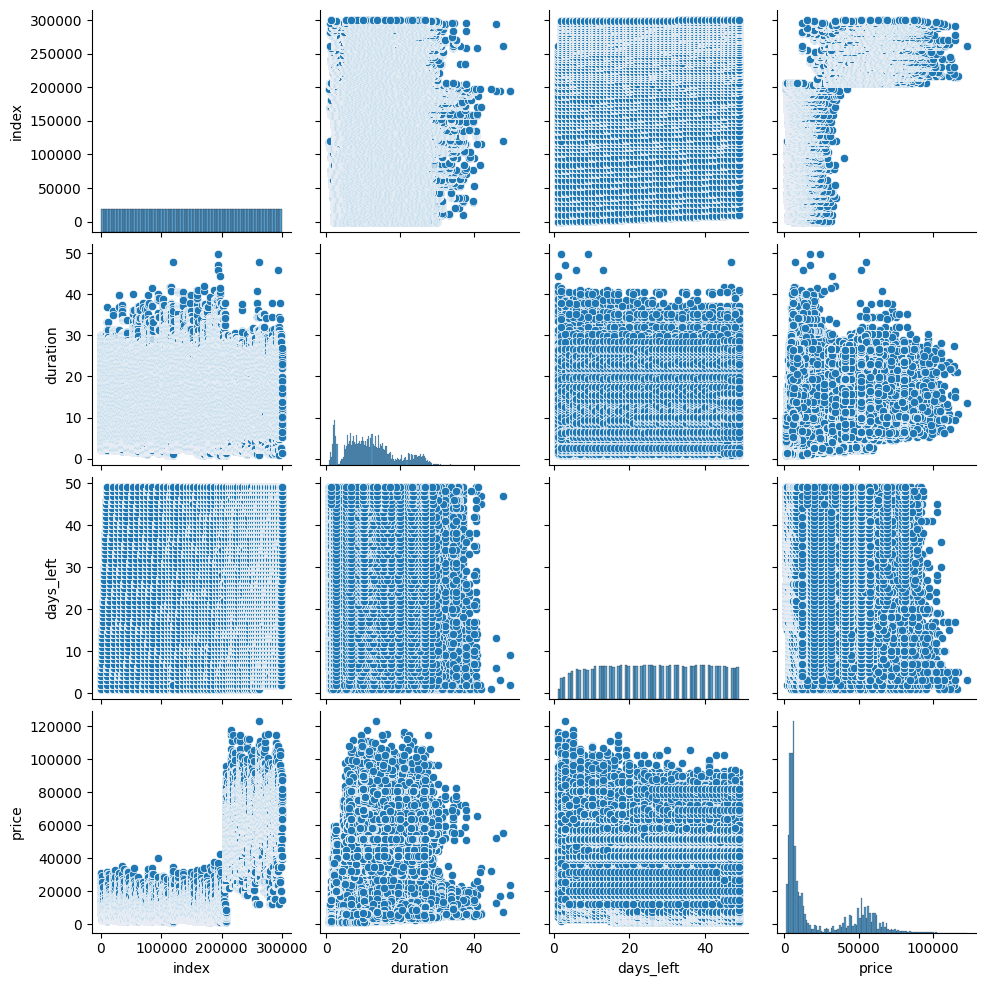

In [99]:
sns.pairplot(df)

In [100]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

/tmp/ipython-input-2416646795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)


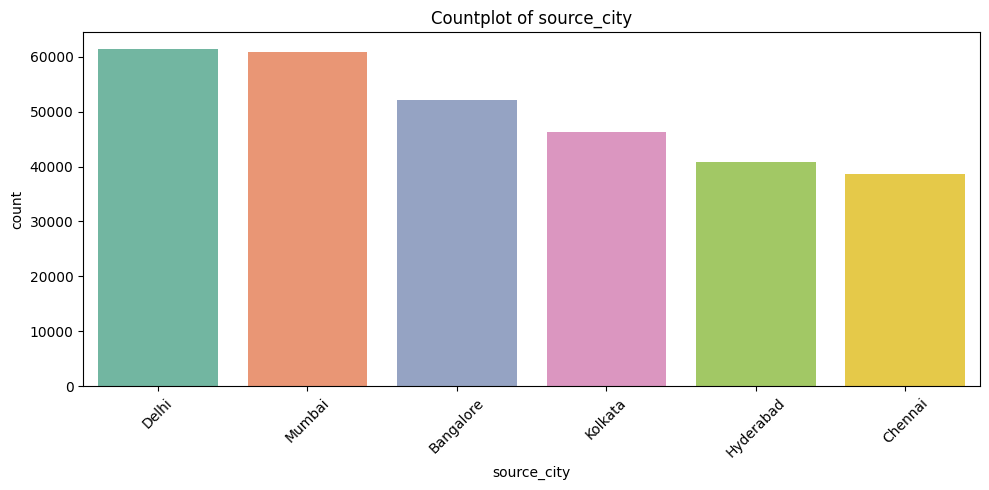

/tmp/ipython-input-2416646795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)


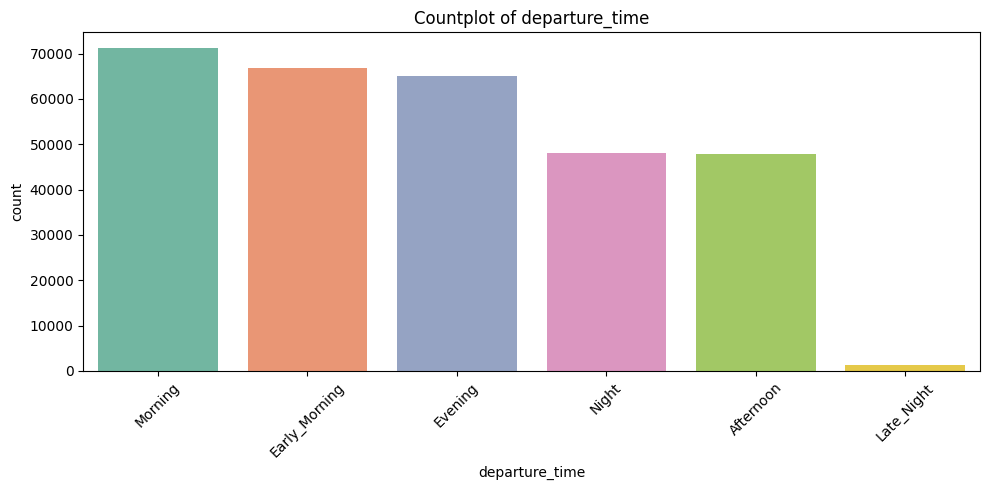

/tmp/ipython-input-2416646795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)


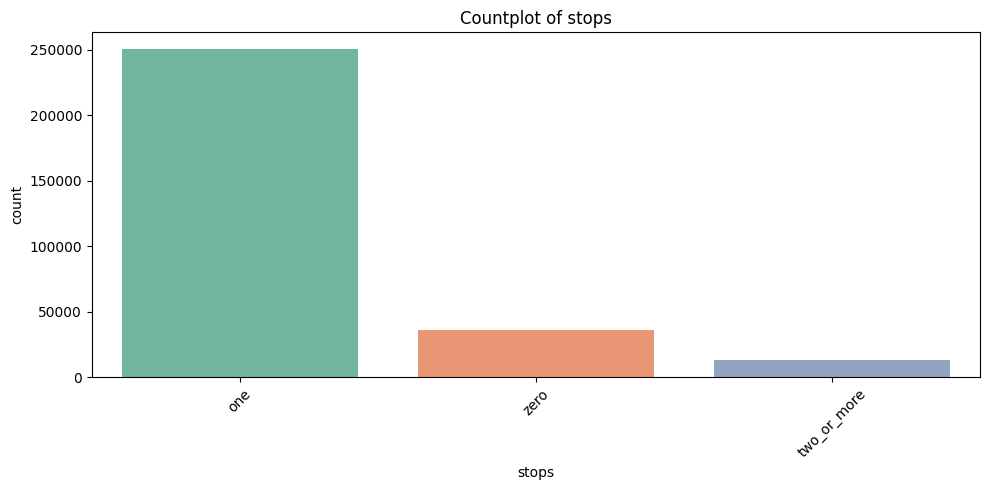

/tmp/ipython-input-2416646795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)


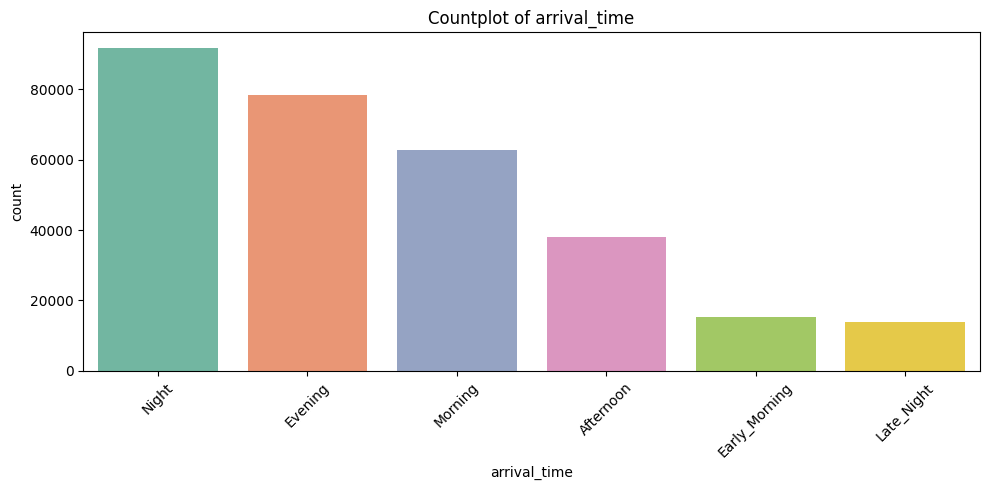

/tmp/ipython-input-2416646795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)


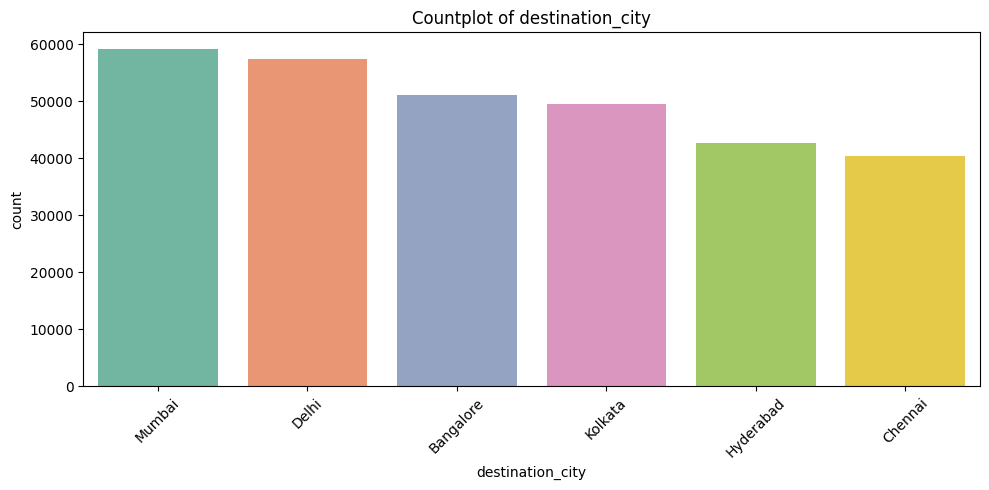

/tmp/ipython-input-2416646795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)


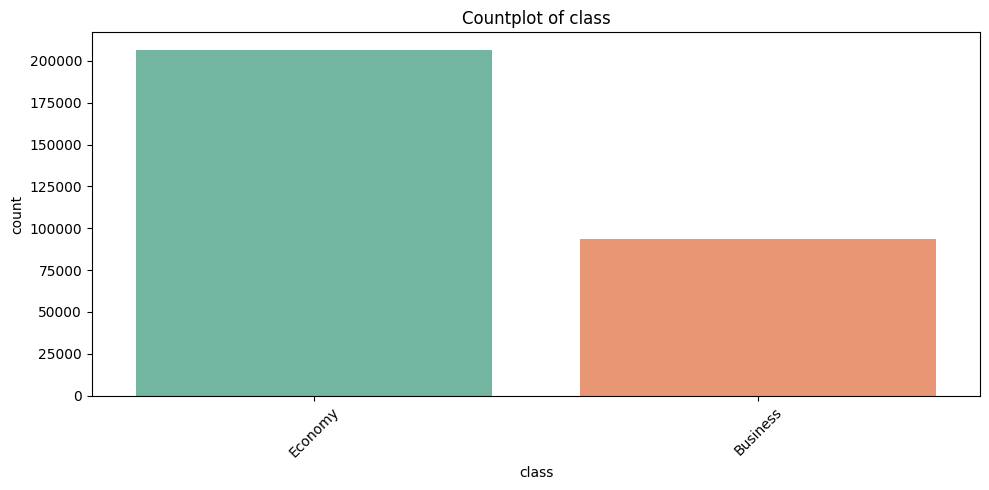

In [101]:
cat_cols = ['source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in dataset.")

In [102]:
df.sample(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
123089,123089,Air_India,AI-573,Kolkata,Evening,one,Morning,Delhi,Economy,14.67,23,20291
244002,244002,Vistara,UK-823,Mumbai,Evening,zero,Evening,Chennai,Business,2.08,37,23898
75437,75437,Vistara,UK-851,Mumbai,Early_Morning,one,Morning,Hyderabad,Economy,26.08,37,3334
223216,223216,Air_India,AI-805,Delhi,Evening,one,Early_Morning,Chennai,Business,11.33,23,45257
122091,122091,SpiceJet,SG-8130,Kolkata,Early_Morning,zero,Morning,Delhi,Economy,2.67,18,4177


In [103]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [104]:
df.flight.value_counts()
df.flight.unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [105]:
df['flight'] = df.flight.str.split('-').str[0]

In [106]:
df.flight.unique()

array(['SG', 'I5', 'UK', 'G8', '6E', 'AI', '6.00E', '0.00E+00'],
      dtype=object)

In [107]:
df.flight = df.flight.replace({'6.00E':'6E','0.00E+00':'0E'})

<Axes: xlabel='flight', ylabel='price'>

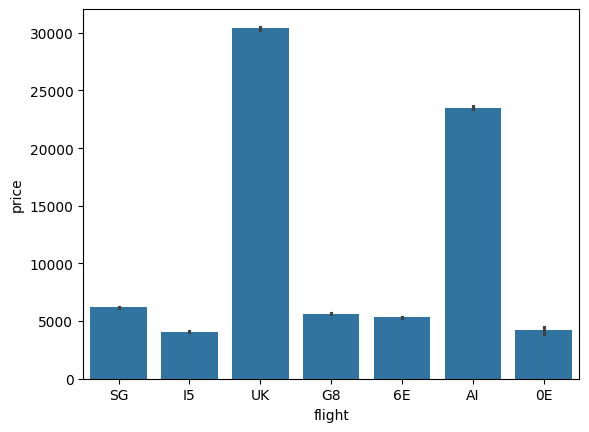

In [108]:
sns.barplot(x = df.flight,y=df.price)


In [109]:
df['departure_time'] = np.where(df['departure_time'] == 'Early_Morning', 'Morning',
                              np.where(df['departure_time'] == 'Afternoon', 'Evening',
                              np.where(df['departure_time'] == 'Late_Night', 'Night',
                                       df['departure_time'])))

df['arrival_time'] = df['arrival_time'].replace({
    'Early_Morning':'Morning',
    'Afternoon':'Evening',
    'Late_Night':'Night'
})

In [110]:
df['duration_hours'] = df['duration'].astype(int)
df['duration_minutes'] = ((df['duration'] - df['duration_hours']) * 60).round().astype(int)

In [111]:
df['days_left'] = pd.cut(df['days_left'],
                              bins=[0, 7, 21, 50],
                              labels=['Short', 'Medium', 'Long'])

In [112]:
df.drop(['duration','index'],axis=1,inplace=True)

In [113]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration_hours,duration_minutes
0,SpiceJet,SG,Delhi,Evening,zero,Night,Mumbai,Economy,Short,5953,2,10
1,SpiceJet,SG,Delhi,Morning,zero,Morning,Mumbai,Economy,Short,5953,2,20
2,AirAsia,I5,Delhi,Morning,zero,Morning,Mumbai,Economy,Short,5956,2,10
3,Vistara,UK,Delhi,Morning,zero,Evening,Mumbai,Economy,Short,5955,2,15
4,Vistara,UK,Delhi,Morning,zero,Morning,Mumbai,Economy,Short,5955,2,20


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   airline           300153 non-null  object  
 1   flight            300153 non-null  object  
 2   source_city       300153 non-null  object  
 3   departure_time    300153 non-null  object  
 4   stops             300153 non-null  object  
 5   arrival_time      300153 non-null  object  
 6   destination_city  300153 non-null  object  
 7   class             300153 non-null  object  
 8   days_left         300153 non-null  category
 9   price             300153 non-null  int64   
 10  duration_hours    300153 non-null  int64   
 11  duration_minutes  300153 non-null  int64   
dtypes: category(1), int64(3), object(8)
memory usage: 25.5+ MB


In [115]:
x = df.drop('price',axis=1)
y = df.price

In [116]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_cols = ['duration_hours', 'duration_minutes']
ohe_cols = ['airline','flight','source_city','destination_city','departure_time','arrival_time']
label_encode_cols = ['stops','class','days_left']


ohe_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])


for col in label_encode_cols:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])


preprocessor = ColumnTransformer(transformers=[
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('scaler', StandardScaler(), numerical_cols)
], remainder='passthrough')

In [117]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_pipeline',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['airline', 'flight', 'source_city',
                                  'destination_city', 'departure_time',
                                  'arrival_time']),
                                ('scaler', StandardScaler(),
                                 ['duration_hours', 'duration_minutes'])])

In [118]:
x = preprocessor.fit_transform(x)

In [119]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [120]:
ytrain

,price
148417,13524
36879,9940
274531,55983
166397,7927
272722,55502
...,...
119879,22869
259178,44280
131932,5102
146867,5574


In [121]:
models = {
                "Random Forest": RandomForestRegressor(n_estimators=100),
                "Decision Tree": DecisionTreeRegressor(),
                "Gradient Boosting": GradientBoostingRegressor(),
                "Linear Regression": LinearRegression(),
                "Lasso": Lasso(alpha=0.1),
                "XGBRegressor": XGBRegressor(n_estimators=100),
                "CatBoosting Regressor": CatBoostRegressor(verbose=False),
                "AdaBoost Regressor": AdaBoostRegressor(),
            }

In [122]:
model_report = {}
for model_name, model in models.items():
  model.fit(xtrain,ytrain)
  y_pred = model.predict(xtest)
  model_report[model_name] = r2_score(ytest, y_pred)
  print(f"\n{model_name} Results:")
  print("R² Score:", round(r2_score(ytest, y_pred), 4))
  print("Adj_r2:",round(adjusted_r2(ytest,y_pred,x)))
  print("MAE:", round(mean_absolute_error(ytest, y_pred), 2))
  print("RMSE:", round(np.sqrt(mean_squared_error(ytest, y_pred)), 2))

print(model_report)


Random Forest Results:
R² Score: 0.9812
Adj_r2: 1
MAE: 1540.23
RMSE: 3112.17

Decision Tree Results:
R² Score: 0.9802
Adj_r2: 1
MAE: 1542.43
RMSE: 3198.46

Gradient Boosting Results:
R² Score: 0.9477
Adj_r2: 1
MAE: 3187.73
RMSE: 5194.05

Linear Regression Results:
R² Score: 0.9093
Adj_r2: 1
MAE: 4553.22
RMSE: 6838.13

Lasso Results:
R² Score: 0.9093
Adj_r2: 1
MAE: 4553.2
RMSE: 6838.14

XGBRegressor Results:
R² Score: 0.9717
Adj_r2: 1
MAE: 2295.39
RMSE: 3818.1

CatBoosting Regressor Results:
R² Score: 0.9716
Adj_r2: 1
MAE: 2297.03
RMSE: 3823.04

AdaBoost Regressor Results:
R² Score: 0.9248
Adj_r2: 1
MAE: 4100.01
RMSE: 6227.04
{'Random Forest': 0.9812106114945207, 'Decision Tree': 0.9801541806158643, 'Gradient Boosting': 0.947664196829438, 'Linear Regression': 0.9092888404120405, 'Lasso': 0.9092884130256597, 'XGBRegressor': 0.9717199802398682, 'CatBoosting Regressor': 0.9716466912574131, 'AdaBoost Regressor': 0.9247772229313447}
